In [44]:
import os
import wfdb
import numpy as np
import pandas as pd
import scipy.io as sci
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # For higher resolution plots
plt.style.use('grayscale')

In [30]:
sorted(os.listdir("training2017"))[:4]

['A00001.hea', 'A00001.mat', 'A00002.hea', 'A00002.mat']

In [31]:
SAMPLING_RATE = 300 # Hz

In [38]:
basepath = "training2017"
first_rec = os.path.join(basepath, "A00001.mat")
firest_rec_header = os.path.join(basepath, "A00001")

In [41]:
header = wfdb.rdrecord(firest_rec_header)
vars(header)

{'record_name': 'A00001',
 'n_sig': 1,
 'fs': 300,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 9000,
 'base_time': datetime.time(5, 5, 15),
 'base_date': datetime.date(2000, 5, 1),
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.127],
        [-0.162],
        [-0.197],
        ...,
        [-0.018],
        [-0.022],
        [-0.021]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['A00001.mat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [24],
 'adc_gain': [1000.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [16],
 'adc_zero': [0],
 'init_value': [-127],
 'checksum': [0],
 'block_size': [0]}

In [43]:
# second recording to get the difference
vars(wfdb.rdrecord(f"{basepath}/A00002"))

{'record_name': 'A00002',
 'n_sig': 1,
 'fs': 300,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 9000,
 'base_time': datetime.time(11, 5, 25),
 'base_date': datetime.date(2000, 5, 1),
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[0.128],
        [0.157],
        [0.189],
        ...,
        [0.   ],
        [0.001],
        [0.002]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['A00002.mat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [24],
 'adc_gain': [1000.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [16],
 'adc_zero': [0],
 'init_value': [128],
 'checksum': [0],
 'block_size': [0]}

In [33]:
rec = sci.loadmat(first_rec)["val"][0]
rec.shape

(9000,)

Text(0.5, 1.0, 'ECG Signal example')

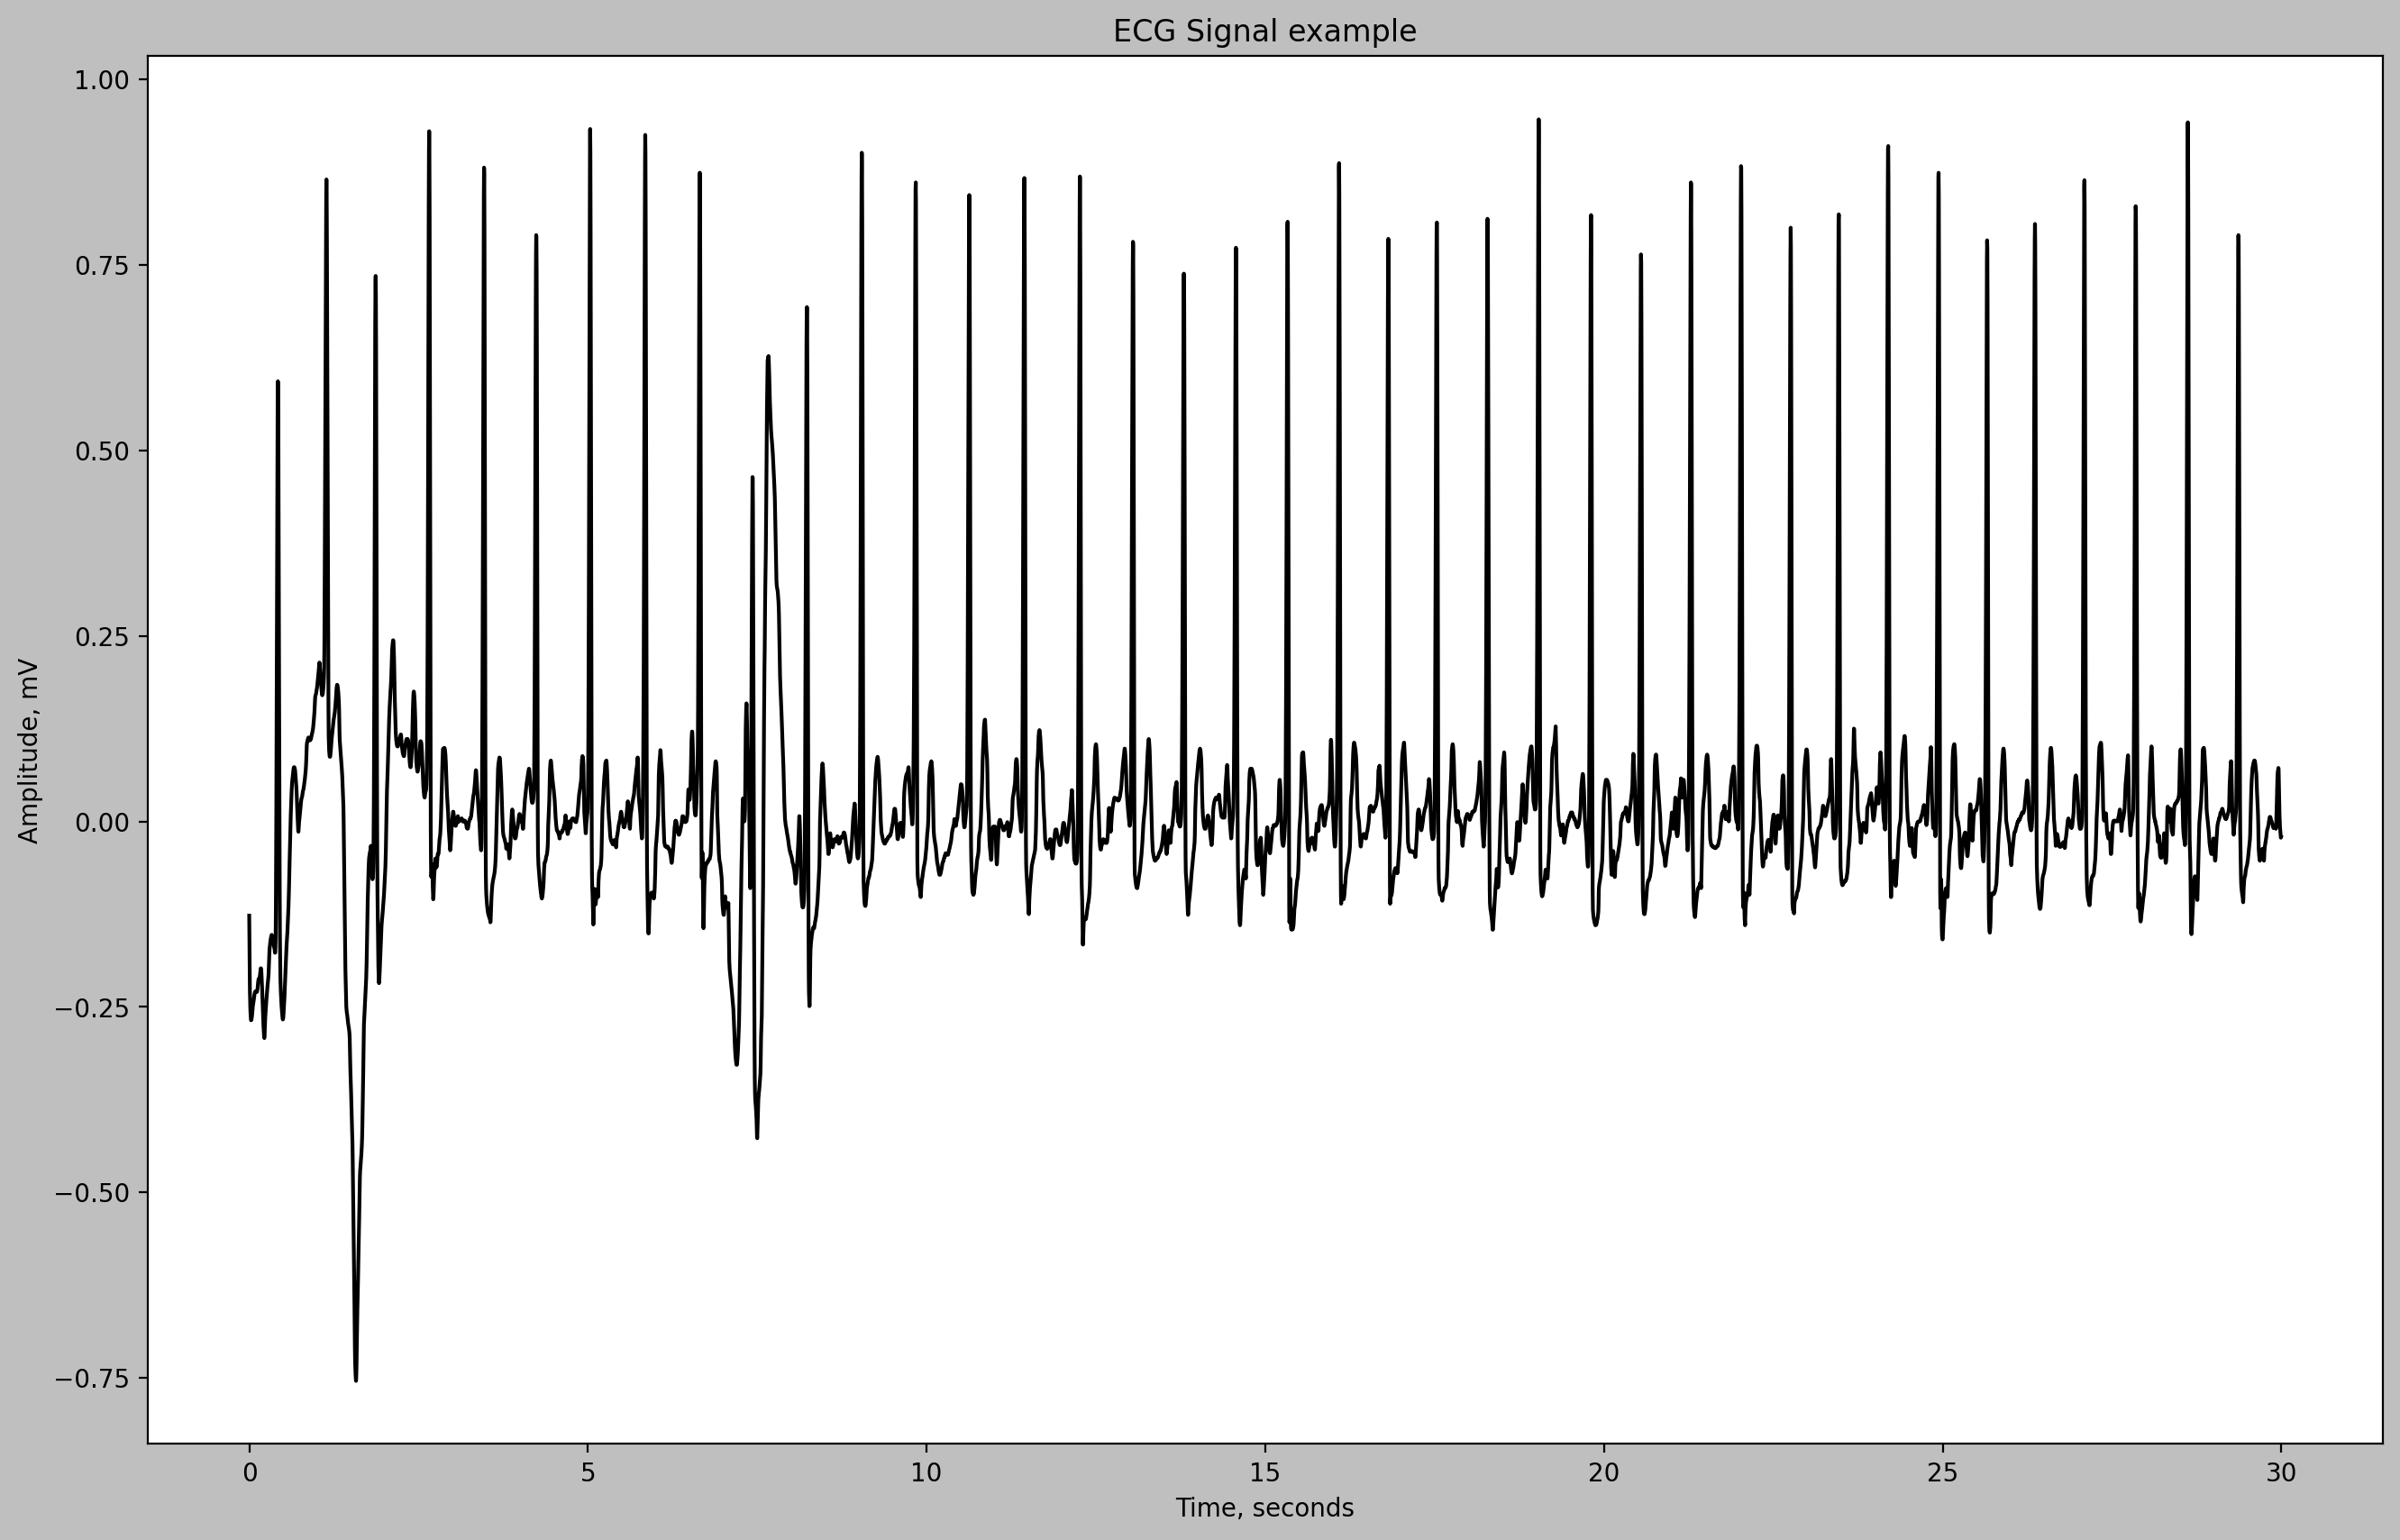

In [34]:
plt.figure(figsize=(16, 10))
plt.plot(np.arange(rec.shape[0]) / SAMPLING_RATE, rec / 1000)
plt.xlabel("Time, seconds")
plt.ylabel("Amplitude, mV")
plt.title("ECG Signal example")

In [47]:
# here are the labels
df = pd.read_csv(os.path.join(basepath, "REFERENCE.csv"))
df.head()

,A00001,N
0,A00002,N
1,A00003,N
2,A00004,A
3,A00005,A
4,A00006,N
